<a href="https://colab.research.google.com/github/joi0804/pdm09/blob/main/project/pdm_prj01_mid_MLP_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PDM: Project01
- ### data: sklearn이 제공하는 당뇨병 데이터  
- ### analysis:  Keras MLP Regression 


# pandas
## MLP
    * 당뇨병 데이터 MLP 회기 분석 모형

> [참고] https://www.tensorflow.org/tutorials/keras/regression?hl=ko

In [ ]:
# import
import matplotlib.pylab as plt
import numpy as np
from sklearn import datasets

In [ ]:
#
# pandas
#
########################################
# 당뇨병 데이터 구조 => DataFrame
# Attribute Information:
#     - age     age in years
#     - sex
#     - bmi     body mass index
#     - bp      average blood pressure
#     - s1      tc, T-Cells (a type of white blood cells)
#     - s2      ldl, low-density lipoproteins
#     - s3      hdl, high-density lipoproteins
#     - s4      tch, thyroid stimulating hormone
#     - s5      ltg, lamotrigine
#     - s6      glu, blood sugar level
# - target  a quantitative measure of disease progression one year after baseline
# [참고] https://wikidocs.net/49981
#       https://suhyun72.tistory.com/entry/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0-scikit-learnsklearn-diabetes
#
########################################
df0 = datasets.load_diabetes(as_frame=True)   # data bunch
# Make dataframe from data bunch
df=df0.frame
print(df.shape)
print(df.columns)
df.head()

(442, 11)
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


## Check data

In [ ]:
# NaN, null
df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [ ]:
# Duplicates
df.duplicated().sum()

0

## target의 값을 결정하는 중요한 특징
- 양의 상관성: bmi, bp, s5
- 반상관성 : s3

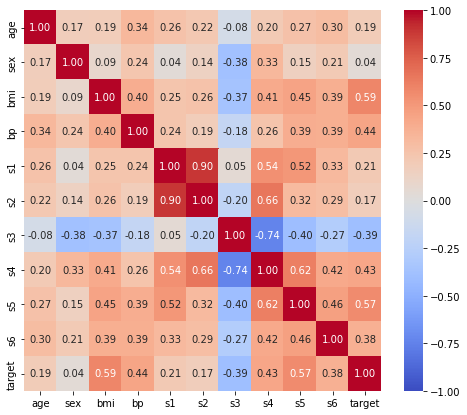

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), 
        xticklabels=df.columns,
        yticklabels=df.columns,
        vmin= -1, vmax=1.0, cmap='coolwarm',
        annot=True, fmt='.2f')
plt.show()

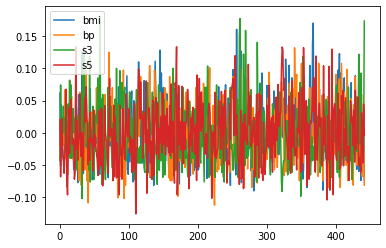

In [ ]:
df[['bmi','bp','s3','s5']].plot()

<Figure size 576x576 with 0 Axes>

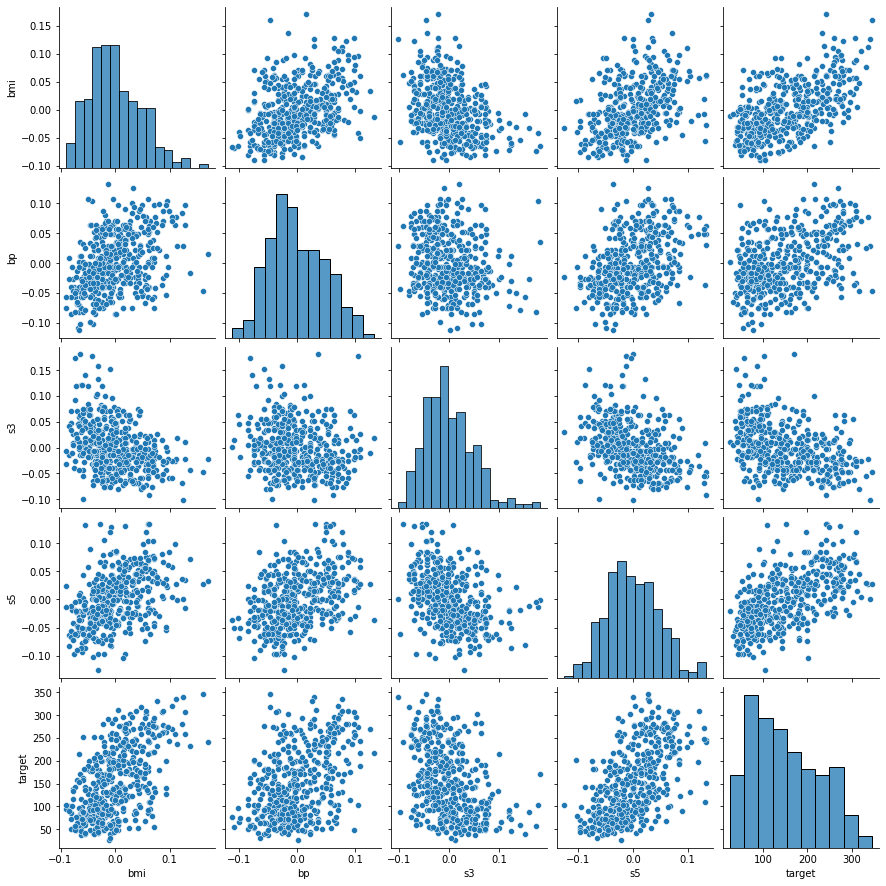

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(df[['bmi', 'bp', 's3','s5','target']])
plt.show()

---

## 데이터 구성
- train data
- test data


In [ ]:
X = df[['bmi', 'bp', 's3','s5']].values
y = df[['target']].values

X.shape,y.shape, type(X),type(y)

((442, 4), (442, 1), numpy.ndarray, numpy.ndarray)

In [ ]:
# target: 2d array => vector
y = np.squeeze(y, 1)
X.shape, y.shape

((442, 4), (442,))

In [ ]:
# train, test data
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((353, 4), (89, 4), (353,), (89,))

## MLP model
- Sequential model
- Functional model

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

### Sequential model

In [ ]:
# Sequential model
model = Sequential()
    
model.add(Dense(16, input_shape = (4,), activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))  #, activation = 'sigmoid'))
    
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer =optimizer,  metrics = ['mse'] )
# model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )
    
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training
history = model.fit(X_train, y_train, 
          epochs= 200, 
          batch_size = 10,
          validation_split = 0.2, verbose=2)

Epoch 1/200
29/29 - 1s - loss: 31503.2910 - mse: 31503.2910 - val_loss: 22446.8125 - val_mse: 22446.8125 - 1s/epoch - 44ms/step
Epoch 2/200
29/29 - 0s - loss: 31452.8906 - mse: 31452.8906 - val_loss: 22400.7500 - val_mse: 22400.7500 - 94ms/epoch - 3ms/step
Epoch 3/200
29/29 - 0s - loss: 31392.8691 - mse: 31392.8691 - val_loss: 22345.2168 - val_mse: 22345.2168 - 103ms/epoch - 4ms/step
Epoch 4/200
29/29 - 0s - loss: 31320.5039 - mse: 31320.5039 - val_loss: 22278.7773 - val_mse: 22278.7773 - 145ms/epoch - 5ms/step
Epoch 5/200
29/29 - 0s - loss: 31233.4570 - mse: 31233.4570 - val_loss: 22203.4922 - val_mse: 22203.4922 - 87ms/epoch - 3ms/step
Epoch 6/200
29/29 - 0s - loss: 31132.4824 - mse: 31132.4824 - val_loss: 22112.3320 - val_mse: 22112.3320 - 109ms/epoch - 4ms/step
Epoch 7/200
29/29 - 0s - loss: 31012.8574 - mse: 31012.8574 - val_loss: 22007.0000 - val_mse: 22007.0000 - 83ms/epoch - 3ms/step
Epoch 8/200
29/29 - 0s - loss: 30873.6055 - mse: 30873.6055 - val_loss: 21880.3848 - val_mse: 2

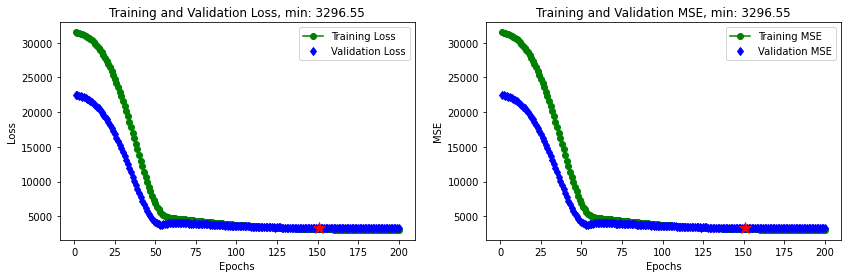

In [ ]:
# Training graphs
#
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mse = history_dict['mse']
val_mse = history_dict['val_mse']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, mse, 'go-', label='Training MSE') #, c='blue')
plt.plot(epochs, val_mse, 'bd', label='Validation MSE') #, c='red')
plt.plot(np.argmin(np.array(val_mse))+1,val_mse[np.argmin(np.array(val_mse))], 'r*', ms=12)
plt.title('Training and Validation MSE, min: ' + str(np.round(val_mse[np.argmin(np.array(val_mse))],2)))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
# test 데이터에 대한 평가
loss, mse = model.evaluate(X_test, y_test, verbose=2, batch_size=10)

print("테스트 세트의 MSE: {:5.2f} ".format(mse))

9/9 - 0s - loss: 2937.0281 - mse: 2937.0278 - 34ms/epoch - 4ms/step
테스트 세트의 MSE: 2937.03 


In [ ]:
# 예측
# 테스트 데이터에 있는 샘플을 사용해 target 값을 예측해 보겠습니다:
# target  a quantitative measure of disease progression one year after baseline

y_pred= model.predict(X_test, batch_size=10)  #.flatten()


9/9 [==============================] - 0s 4ms/step


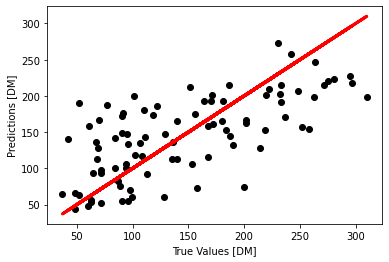

In [ ]:
plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test, y_test, 'r', linewidth=3)
plt.xlabel('True Values [DM]')
plt.ylabel('Predictions [DM]')
# plt.axis('equal')
# plt.axis('square')
plt.show()

In [ ]:
# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

mean_squared_errors: 2937.027830114201
r2_score: 0.44565048916605265


---

### [DIY] MLP Functional model을 구성해서 분석하시오.

In [ ]:
# Functional model
from keras import layers, models

inputs = layers.Input(shape=(4,))
x = Dense(16, activation='relu')(inputs)
x = Dense(8, activation='relu')(x)
output = Dense(1)(x)

model = models.Model(inputs=inputs, outputs=output)

optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer =optimizer,  metrics = ['mse'] )
# model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_3 (Dense)             (None, 16)                80        
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training
history = model.fit(X_train, y_train, 
          epochs= 200, 
          batch_size = 10,
          validation_split = 0.2, verbose=2)

Epoch 1/200
29/29 - 1s - loss: 31510.8906 - mse: 31510.8906 - val_loss: 22457.3242 - val_mse: 22457.3242 - 983ms/epoch - 34ms/step
Epoch 2/200
29/29 - 0s - loss: 31467.5996 - mse: 31467.5996 - val_loss: 22418.0098 - val_mse: 22418.0117 - 97ms/epoch - 3ms/step
Epoch 3/200
29/29 - 0s - loss: 31414.2910 - mse: 31414.2910 - val_loss: 22368.9199 - val_mse: 22368.9199 - 103ms/epoch - 4ms/step
Epoch 4/200
29/29 - 0s - loss: 31344.4141 - mse: 31344.4141 - val_loss: 22302.4863 - val_mse: 22302.4863 - 91ms/epoch - 3ms/step
Epoch 5/200
29/29 - 0s - loss: 31257.1660 - mse: 31257.1660 - val_loss: 22224.2656 - val_mse: 22224.2656 - 99ms/epoch - 3ms/step
Epoch 6/200
29/29 - 0s - loss: 31150.3086 - mse: 31150.3086 - val_loss: 22129.1387 - val_mse: 22129.1387 - 93ms/epoch - 3ms/step
Epoch 7/200
29/29 - 0s - loss: 31023.7051 - mse: 31023.7051 - val_loss: 22015.6367 - val_mse: 22015.6367 - 88ms/epoch - 3ms/step
Epoch 8/200
29/29 - 0s - loss: 30869.0781 - mse: 30869.0781 - val_loss: 21875.7695 - val_mse: 

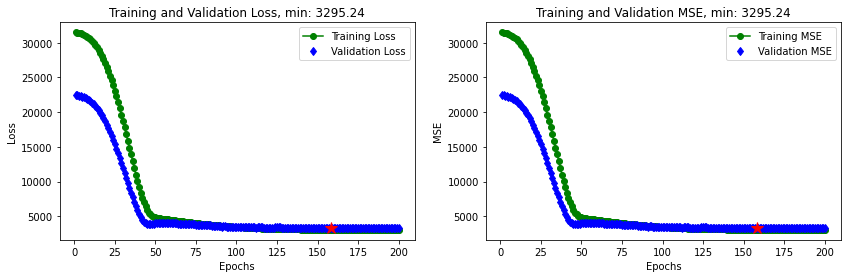

In [ ]:
# Training graphs
#
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mse = history_dict['mse']
val_mse = history_dict['val_mse']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, mse, 'go-', label='Training MSE') #, c='blue')
plt.plot(epochs, val_mse, 'bd', label='Validation MSE') #, c='red')
plt.plot(np.argmin(np.array(val_mse))+1,val_mse[np.argmin(np.array(val_mse))], 'r*', ms=12)
plt.title('Training and Validation MSE, min: ' + str(np.round(val_mse[np.argmin(np.array(val_mse))],2)))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
# test 데이터에 대한 평가
loss, mse = model.evaluate(X_test, y_test, verbose=2, batch_size=10)

print("테스트 세트의 MSE: {:5.2f} ".format(mse))

9/9 - 0s - loss: 2956.4255 - mse: 2956.4255 - 28ms/epoch - 3ms/step
테스트 세트의 MSE: 2956.43 


In [ ]:
# 예측
# 테스트 데이터에 있는 샘플을 사용해 target 값을 예측해 보겠습니다:
# target  a quantitative measure of disease progression one year after baseline

y_pred= model.predict(X_test, batch_size=10)  #.flatten()


9/9 [==============================] - 0s 2ms/step


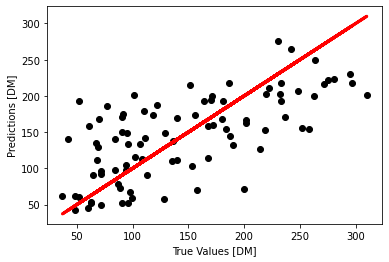

In [ ]:
plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test, y_test, 'r', linewidth=3)
plt.xlabel('True Values [DM]')
plt.ylabel('Predictions [DM]')
# plt.axis('equal')
# plt.axis('square')
plt.show()

In [ ]:
# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

mean_squared_errors: 2956.4252586435473
r2_score: 0.4419893202433661


## pdm09 서준용

---
[DIY] 도전해서 아래에 완성하시오.
---
## target의 값을 결정하는 중요한 특징을 변경
- 양의 상관성: bmi, bp, s5
- 반상관성 : s3

1. 양의 상관성 특징에서 bp를 제외하고 모델을 훈련
2. 양의 상관성 특징에 s4를 추가해서 모델을 훈련
3. optimizer 또는 activation 을 변경해서 모델 훈련
4. 위의 결과를 비교하는 결과 정리

## 1. 양의 상관성 특징에서 bp를 제외하고 모델을 훈련

(442, 11)
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


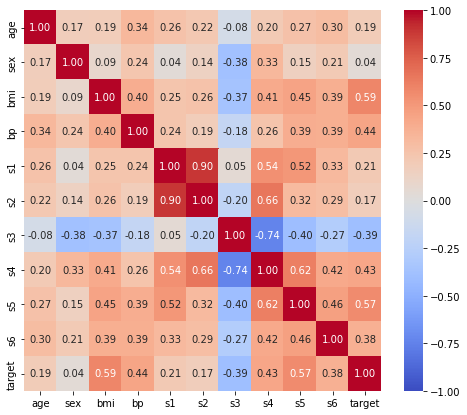

In [35]:
# 1. bp를 제외하고 모델을 훈련
import matplotlib.pylab as plt
import numpy as np
from sklearn import datasets
import seaborn as sns
df0 = datasets.load_diabetes(as_frame=True)   # data bunch
# Make dataframe from data bunch
df=df0.frame
print(df.shape)
print(df.columns)
df.head()

plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), 
        xticklabels=df.columns,
        yticklabels=df.columns,
        vmin= -1, vmax=1.0, cmap='coolwarm',
        annot=True, fmt='.2f')
plt.show()

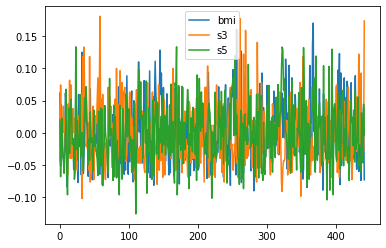

In [36]:
df[['bmi','s3','s5']].plot() #1

<Figure size 576x576 with 0 Axes>

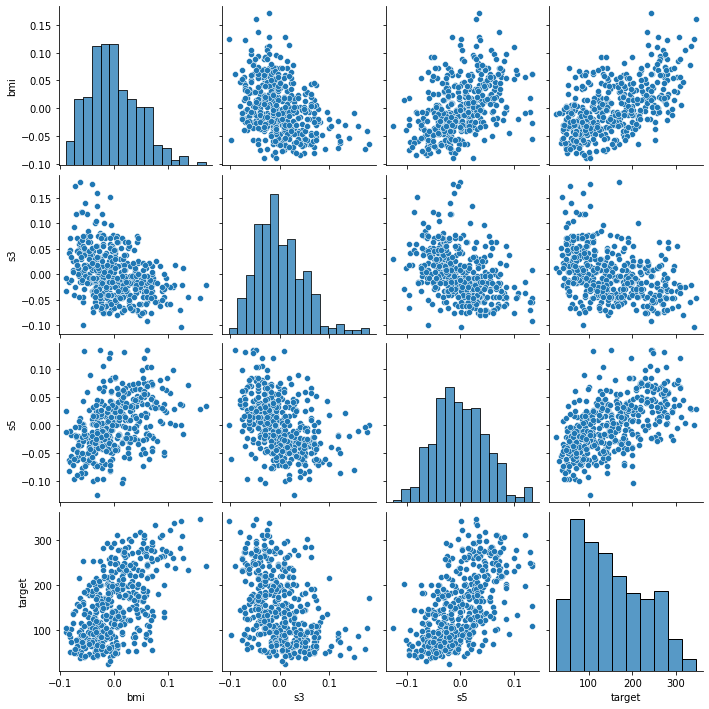

In [37]:
plt.figure(figsize=(8,8))
sns.pairplot(df[['bmi','s3','s5','target']]) #1
plt.show()

In [38]:
X = df[['bmi','s3','s5']].values
y = df[['target']].values

X.shape,y.shape, type(X),type(y)

((442, 3), (442, 1), numpy.ndarray, numpy.ndarray)

In [39]:
y = np.squeeze(y, 1)
X.shape, y.shape

((442, 3), (442,))

In [40]:
# train, test data
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((353, 3), (89, 3), (353,), (89,))

In [41]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [42]:
# Sequential model
model = Sequential()
    
model.add(Dense(16, input_shape = (3,), activation = 'relu')) #1
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))  #, activation = 'sigmoid'))
    
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )
# model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                64        
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Training
history = model.fit(X_train, y_train, 
          epochs= 200, 
          batch_size = 10,
          validation_split = 0.2, verbose=2)

Epoch 1/200
29/29 - 1s - loss: 31500.0039 - mse: 31500.0039 - val_loss: 22447.3047 - val_mse: 22447.3047 - 651ms/epoch - 22ms/step
Epoch 2/200
29/29 - 0s - loss: 31435.8613 - mse: 31435.8613 - val_loss: 22383.5977 - val_mse: 22383.5957 - 73ms/epoch - 3ms/step
Epoch 3/200
29/29 - 0s - loss: 31337.0078 - mse: 31337.0078 - val_loss: 22288.3125 - val_mse: 22288.3125 - 73ms/epoch - 3ms/step
Epoch 4/200
29/29 - 0s - loss: 31197.3730 - mse: 31197.3730 - val_loss: 22152.2734 - val_mse: 22152.2734 - 88ms/epoch - 3ms/step
Epoch 5/200
29/29 - 0s - loss: 30999.8223 - mse: 30999.8223 - val_loss: 21965.9629 - val_mse: 21965.9629 - 86ms/epoch - 3ms/step
Epoch 6/200
29/29 - 0s - loss: 30735.2559 - mse: 30735.2559 - val_loss: 21721.1484 - val_mse: 21721.1484 - 84ms/epoch - 3ms/step
Epoch 7/200
29/29 - 0s - loss: 30395.0039 - mse: 30395.0039 - val_loss: 21408.3359 - val_mse: 21408.3359 - 74ms/epoch - 3ms/step
Epoch 8/200
29/29 - 0s - loss: 29970.1172 - mse: 29970.1172 - val_loss: 21023.3105 - val_mse: 2

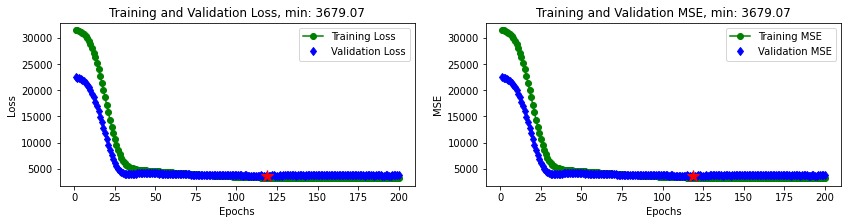

In [44]:
# Training graphs

import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 3))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mse = history_dict['mse']
val_mse = history_dict['val_mse']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, mse, 'go-', label='Training MSE') #, c='blue')
plt.plot(epochs, val_mse, 'bd', label='Validation MSE') #, c='red')
plt.plot(np.argmin(np.array(val_mse))+1,val_mse[np.argmin(np.array(val_mse))], 'r*', ms=12)
plt.title('Training and Validation MSE, min: ' + str(np.round(val_mse[np.argmin(np.array(val_mse))],2)))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [49]:
# test 데이터에 대한 평가
loss, mse = model.evaluate(X_test, y_test, verbose=2, batch_size=10)

print("테스트 세트의 MSE: {:5.2f} ".format(mse))

9/9 - 0s - loss: 2893.9319 - mse: 2893.9319 - 27ms/epoch - 3ms/step
테스트 세트의 MSE: 2893.93 


In [50]:
# 예측
# 테스트 데이터에 있는 샘플을 사용해 target 값을 예측해 보겠습니다:
# target  a quantitative measure of disease progression one year after baseline

y_pred= model.predict(X_test, batch_size=10)  #.flatten()


9/9 [==============================] - 0s 2ms/step


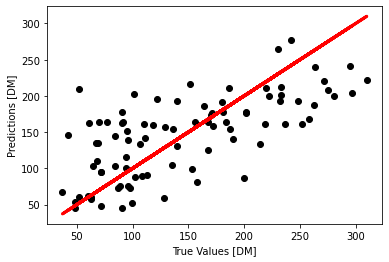

In [51]:
plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test, y_test, 'r', linewidth=3)
plt.xlabel('True Values [DM]')
plt.ylabel('Predictions [DM]')
# plt.axis('equal')
# plt.axis('square')
plt.show()

In [52]:
# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

mean_squared_errors: 2893.931891204797
r2_score: 0.453784634988031


## 양의 상관성 특징에서 bp를 제외하고 모델을 훈련
bp를 제외 했을 시 기존의 Training graphs와 제외 했을 때의 Training graphs를 보면 기존의 Training graphs의 Epochs는 150주위 인데 제외했을 때의 Training graphs은 100~125사이이다

## 2. 양의 상관성 특징에 s4를 추가해서 모델을 훈련

(442, 11)
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


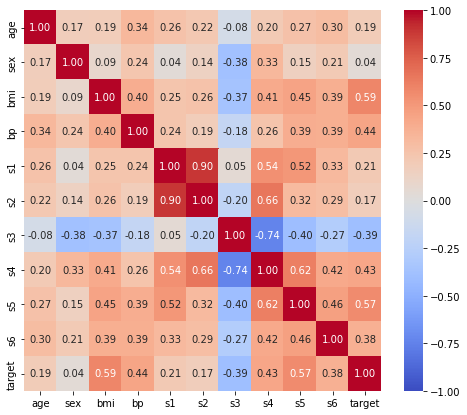

In [53]:
# 2. 양의 상관성 특징에 s4를 추가해서 모델을 훈련
import matplotlib.pylab as plt
import numpy as np
from sklearn import datasets
import seaborn as sns
df0 = datasets.load_diabetes(as_frame=True)   # data bunch
# Make dataframe from data bunch
df=df0.frame
print(df.shape)
print(df.columns)
df.head()

plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), 
        xticklabels=df.columns,
        yticklabels=df.columns,
        vmin= -1, vmax=1.0, cmap='coolwarm',
        annot=True, fmt='.2f')
plt.show()

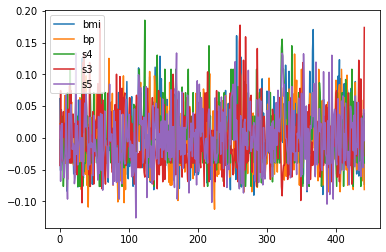

In [54]:
df[['bmi','bp','s4','s3','s5']].plot()

<Figure size 576x576 with 0 Axes>

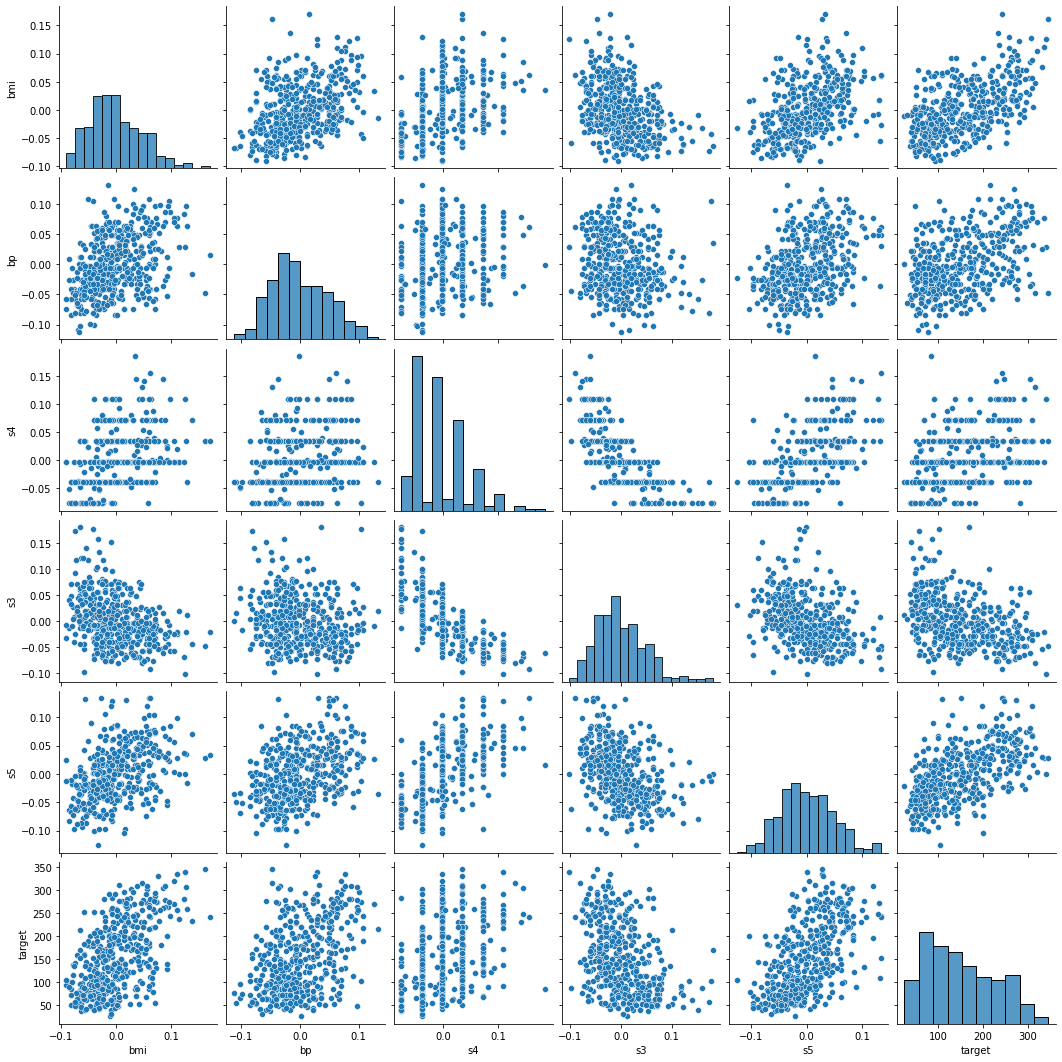

In [55]:
plt.figure(figsize=(8,8))
sns.pairplot(df[['bmi','bp', 's4', 's3','s5','target']]) #2
plt.show()

In [56]:
X = df[['bmi','s4','bp','s3','s5']].values
y = df[['target']].values

X.shape,y.shape, type(X),type(y)

((442, 5), (442, 1), numpy.ndarray, numpy.ndarray)

In [57]:
y = np.squeeze(y, 1)
X.shape, y.shape

((442, 5), (442,))

In [58]:
# train, test data
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((353, 5), (89, 5), (353,), (89,))

In [59]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [60]:
# Sequential model
model = Sequential()
    
model.add(Dense(16, input_shape = (5,), activation = 'relu')) #1
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))  #, activation = 'sigmoid'))
    
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )
# model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                96        
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Training
history = model.fit(X_train, y_train, 
          epochs= 200, 
          batch_size = 10,
          validation_split = 0.2, verbose=2)

Epoch 1/200
29/29 - 1s - loss: 31507.9609 - mse: 31507.9609 - val_loss: 22444.7188 - val_mse: 22444.7188 - 945ms/epoch - 33ms/step
Epoch 2/200
29/29 - 0s - loss: 31442.2051 - mse: 31442.2051 - val_loss: 22371.3848 - val_mse: 22371.3848 - 75ms/epoch - 3ms/step
Epoch 3/200
29/29 - 0s - loss: 31332.8652 - mse: 31332.8613 - val_loss: 22255.2930 - val_mse: 22255.2930 - 75ms/epoch - 3ms/step
Epoch 4/200
29/29 - 0s - loss: 31160.5488 - mse: 31160.5488 - val_loss: 22082.0176 - val_mse: 22082.0176 - 89ms/epoch - 3ms/step
Epoch 5/200
29/29 - 0s - loss: 30910.3047 - mse: 30910.3047 - val_loss: 21831.1387 - val_mse: 21831.1387 - 86ms/epoch - 3ms/step
Epoch 6/200
29/29 - 0s - loss: 30547.5664 - mse: 30547.5664 - val_loss: 21485.4922 - val_mse: 21485.4922 - 78ms/epoch - 3ms/step
Epoch 7/200
29/29 - 0s - loss: 30059.6699 - mse: 30059.6699 - val_loss: 21027.8125 - val_mse: 21027.8125 - 77ms/epoch - 3ms/step
Epoch 8/200
29/29 - 0s - loss: 29420.8281 - mse: 29420.8281 - val_loss: 20453.0391 - val_mse: 2

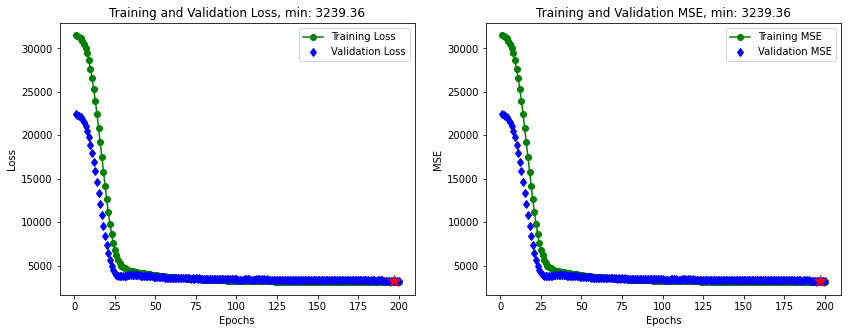

In [62]:
# Training graphs

import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mse = history_dict['mse']
val_mse = history_dict['val_mse']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, mse, 'go-', label='Training MSE') #, c='blue')
plt.plot(epochs, val_mse, 'bd', label='Validation MSE') #, c='red')
plt.plot(np.argmin(np.array(val_mse))+1,val_mse[np.argmin(np.array(val_mse))], 'r*', ms=12)
plt.title('Training and Validation MSE, min: ' + str(np.round(val_mse[np.argmin(np.array(val_mse))],2)))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [63]:
# test 데이터에 대한 평가
loss, mse = model.evaluate(X_test, y_test, verbose=2, batch_size=10)

print("테스트 세트의 MSE: {:5.2f} ".format(mse))

9/9 - 0s - loss: 2914.1790 - mse: 2914.1790 - 26ms/epoch - 3ms/step
테스트 세트의 MSE: 2914.18 


In [64]:
# 예측
# 테스트 데이터에 있는 샘플을 사용해 target 값을 예측해 보겠습니다:
# target  a quantitative measure of disease progression one year after baseline

y_pred= model.predict(X_test, batch_size=10)  #.flatten()


9/9 [==============================] - 0s 2ms/step


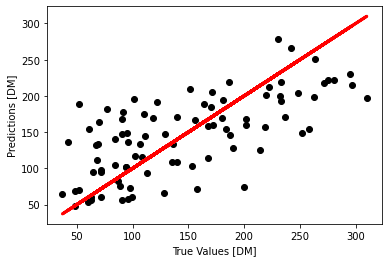

In [65]:
plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test, y_test, 'r', linewidth=3)
plt.xlabel('True Values [DM]')
plt.ylabel('Predictions [DM]')
# plt.axis('equal')
# plt.axis('square')
plt.show()

In [66]:
# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

mean_squared_errors: 2914.179005355435
r2_score: 0.44996309209690744


## 양의 상관성 특징에 s4를 추가해서 모델을 훈련
기존의 Training graphs의 epochs는 150주위인데 s4를 추가한 Training graphs은 Epochs가175~200사이이다

## 3. optimizer 또는 activation 을 변경해서 모델 훈련

(442, 11)
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


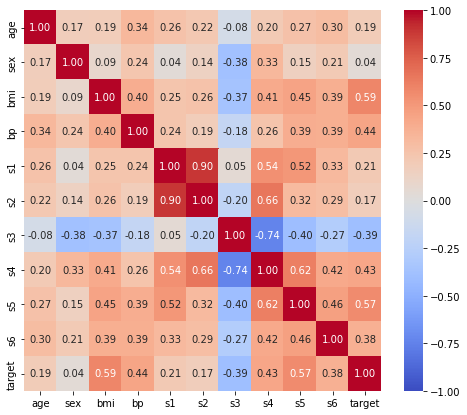

In [67]:
# 3. optimizer 또는 activation 을 변경해서 모델 훈련 pdm09서준용
import matplotlib.pylab as plt
import numpy as np
from sklearn import datasets
import seaborn as sns
df0 = datasets.load_diabetes(as_frame=True)   # data bunch
# Make dataframe from data bunch
df=df0.frame
print(df.shape)
print(df.columns)
df.head()

plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), 
        xticklabels=df.columns,
        yticklabels=df.columns,
        vmin= -1, vmax=1.0, cmap='coolwarm',
        annot=True, fmt='.2f')
plt.show()

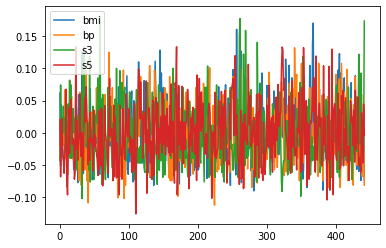

In [68]:
df[['bmi','bp','s3','s5']].plot() 


<Figure size 576x576 with 0 Axes>

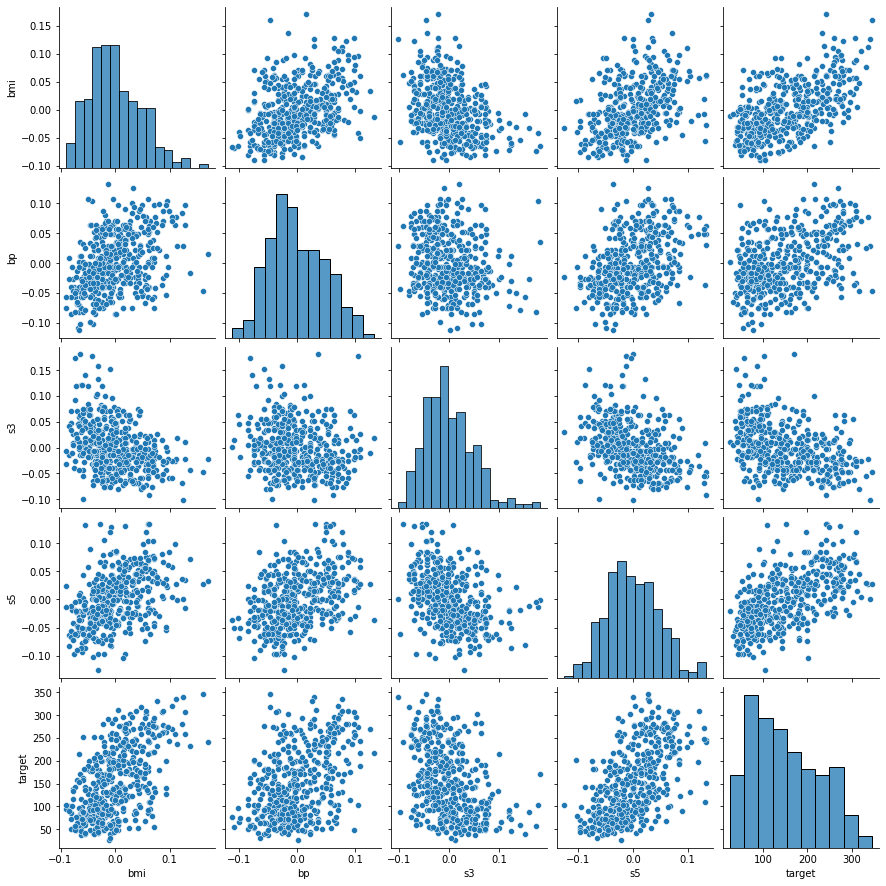

In [69]:
plt.figure(figsize=(8,8))
sns.pairplot(df[['bmi','bp', 's3','s5','target']])
plt.show()


In [70]:
X = df[['bmi','bp','s3','s5']].values
y = df[['target']].values

X.shape,y.shape, type(X),type(y)

((442, 4), (442, 1), numpy.ndarray, numpy.ndarray)

In [71]:
y = np.squeeze(y, 1)
X.shape, y.shape

((442, 4), (442,))

In [72]:
# train, test data
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((353, 4), (89, 4), (353,), (89,))

In [73]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [74]:
# Sequential model
model = Sequential()
    
model.add(Dense(16, input_shape = (4,), activation = 'relu')) 
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) #3
    
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] ) #3
# model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                80        
                                                                 
 dense_19 (Dense)            (None, 8)                 136       
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Training
history = model.fit(X_train, y_train, 
          epochs= 200, 
          batch_size = 10,
          validation_split = 0.2, verbose=2)

Epoch 1/200
29/29 - 1s - loss: 31365.4121 - mse: 31365.4141 - val_loss: 22346.4922 - val_mse: 22346.4922 - 1s/epoch - 38ms/step
Epoch 2/200
29/29 - 0s - loss: 31351.0078 - mse: 31351.0078 - val_loss: 22331.5586 - val_mse: 22331.5586 - 117ms/epoch - 4ms/step
Epoch 3/200
29/29 - 0s - loss: 31329.9395 - mse: 31329.9395 - val_loss: 22310.6094 - val_mse: 22310.6094 - 88ms/epoch - 3ms/step
Epoch 4/200
29/29 - 0s - loss: 31301.9004 - mse: 31301.9004 - val_loss: 22285.0625 - val_mse: 22285.0625 - 85ms/epoch - 3ms/step
Epoch 5/200
29/29 - 0s - loss: 31272.1094 - mse: 31272.1094 - val_loss: 22261.9336 - val_mse: 22261.9336 - 74ms/epoch - 3ms/step
Epoch 6/200
29/29 - 0s - loss: 31248.1602 - mse: 31248.1641 - val_loss: 22246.0801 - val_mse: 22246.0801 - 94ms/epoch - 3ms/step
Epoch 7/200
29/29 - 0s - loss: 31233.3945 - mse: 31233.3945 - val_loss: 22237.1504 - val_mse: 22237.1504 - 75ms/epoch - 3ms/step
Epoch 8/200
29/29 - 0s - loss: 31225.4512 - mse: 31225.4512 - val_loss: 22232.3477 - val_mse: 222

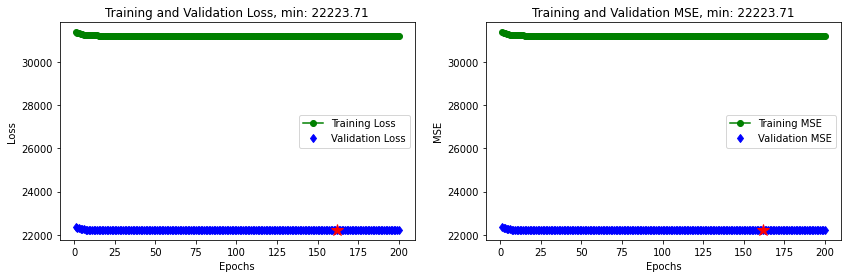

In [76]:
# Training graphs

import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mse = history_dict['mse']
val_mse = history_dict['val_mse']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, mse, 'go-', label='Training MSE') #, c='blue')
plt.plot(epochs, val_mse, 'bd', label='Validation MSE') #, c='red')
plt.plot(np.argmin(np.array(val_mse))+1,val_mse[np.argmin(np.array(val_mse))], 'r*', ms=12)
plt.title('Training and Validation MSE, min: ' + str(np.round(val_mse[np.argmin(np.array(val_mse))],2)))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [77]:
# test 데이터에 대한 평가
loss, mse = model.evaluate(X_test, y_test, verbose=2, batch_size=10)

print("테스트 세트의 MSE: {:5.2f} ".format(mse))

9/9 - 0s - loss: 26258.0332 - mse: 26258.0332 - 41ms/epoch - 5ms/step
테스트 세트의 MSE: 26258.03 


In [78]:
# 예측
# 테스트 데이터에 있는 샘플을 사용해 target 값을 예측해 보겠습니다:
# target  a quantitative measure of disease progression one year after baseline

y_pred= model.predict(X_test, batch_size=10)  #.flatten()


9/9 [==============================] - 0s 3ms/step


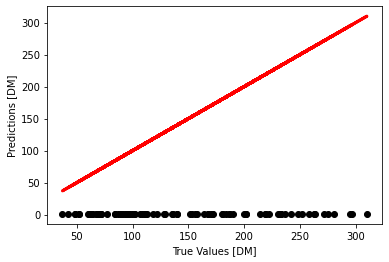

In [79]:
plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test, y_test, 'r', linewidth=3)
plt.xlabel('True Values [DM]')
plt.ylabel('Predictions [DM]')
# plt.axis('equal')
# plt.axis('square')
plt.show()

In [80]:
# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

mean_squared_errors: 26258.036056434274
r2_score: -3.9560747413069306


## optimizer 또는 activation 을 변경해서 모델 훈련 
activation을 sigmoid로 바꾸고 optimizer 를 adam으로 바꾸었을 때 기존의 Training graphs, 그래프와 최종평가와 바꾸고 난다음의 Training graphs,그래프,최종평가가 다르다는걸 알수있다 

